In [1]:
import numpy as np
import pandas as pd
from skbio import OrdinationResults
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import files
beta_file = '../results/soil_differentials.csv'
beta = pd.read_csv(beta_file)
taxa = pd.read_csv('../data/soils/taxonomy.tsv', sep="\t")

#fix headers
beta.rename(columns={"Unnamed: 0" : "sampleid"}, inplace=True)

#merge!
betataxa = pd.merge(taxa, beta, left_on="sampleid", right_on="sampleid")

First save biplot to a file

In [3]:
beta = betataxa.set_index('sampleid')

In [4]:
taxa = pd.DataFrame(list(beta.Taxon.apply(lambda x: x.split('; ')).values))
taxa.columns = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']

In [5]:
taxa.index = beta.index
beta = pd.concat((taxa, beta), axis=1)

In [6]:
colnames = ['microbial_biomass', 'ph', 'tot_nitro', 'tot_org_carb', 'water_content_soil']
data = beta[colnames]

In [7]:
taxa.to_csv('taxa.txt', sep='\t')

Now, let's investigate the top hits

In [8]:
beta[['Taxon', 'ph']].sort_values('ph').head()

,Taxon,ph
sampleid,,
GACGTAGGGGGCCAGCGTTGCTCGGAATTACTGGGCGTAAAGGGTCCGTAGGCGGTGTGGTAAGTCGGGAGTGAAATCTCTGGGCTTAACTCAGAGGCTGCTTCCGAAACTGCCGTGCTAGAGTGCGAGAGAGGCAAGTGGAATTGCGGG,k__Bacteria; p__Acidobacteria; c__DA052; o__El...,-3.603309
GACGTAGGGGGCCAGCGTTGCTCGGAATTACTGGGCGTAAAGGGTCCGTAGGCGGTGCGGTAAGTTGGGAGTGAAATCTCTGGGCTTAACTCAGAGGCTGCTTCCAAAACTACCGTGCTAGAGTGCGAGAGAGGCAAGTGGAATTGCGGG,k__Bacteria; p__Acidobacteria; c__DA052; o__El...,-3.510978
GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGCGGTTCGTTAAGTCTGATGTTAAAGATCGGGGCTCAACCCCGGGAGTGCATTGGATACTGGCGGACTGGAGTGTGGTAGAGGCTAGTGGAATTCCCAG,k__Bacteria; p__Cyanobacteria; c__4C0d-2; o__M...,-3.492542
TACGAGGGGGGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTTTGGTAAGTCTTATGTGAAATCTATGGGCTCAACTCATAGACTGCATGAGAAACTGCCGGGCTTGAGTGTGGGAGAGGTGAGTGGAATTTCCGG,k__Bacteria; p__Acidobacteria; c__Acidobacteri...,-3.439666
TACGTAGGCAGCAAGCGTTGTTCGGAGTTACTGGGCGTAAAGGGTGTGTAGGCGGCTTCCTAAGTTTGGTGTGAAATCTCCCGGCTCAACCGGGAGGGTGCGCCGAATACTGAGAGGCTAGAGTGCGGGAGAGGAAAGTGGAATTCCTGG,k__Bacteria; p__Acidobacteria; c__Solibacteres...,-3.403626


In [9]:
print('\n'.join(list(map(lambda x: '>ph_low_%d\n%s' % x, 
                   zip(np.arange(5), list(beta[['Taxon', 'ph']].sort_values('ph').head(5).index)))
              )
         )
     )

>ph_low_0
GACGTAGGGGGCCAGCGTTGCTCGGAATTACTGGGCGTAAAGGGTCCGTAGGCGGTGTGGTAAGTCGGGAGTGAAATCTCTGGGCTTAACTCAGAGGCTGCTTCCGAAACTGCCGTGCTAGAGTGCGAGAGAGGCAAGTGGAATTGCGGG
>ph_low_1
GACGTAGGGGGCCAGCGTTGCTCGGAATTACTGGGCGTAAAGGGTCCGTAGGCGGTGCGGTAAGTTGGGAGTGAAATCTCTGGGCTTAACTCAGAGGCTGCTTCCAAAACTACCGTGCTAGAGTGCGAGAGAGGCAAGTGGAATTGCGGG
>ph_low_2
GACGTAGGATGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGAGTTCGTAGGCGGTTCGTTAAGTCTGATGTTAAAGATCGGGGCTCAACCCCGGGAGTGCATTGGATACTGGCGGACTGGAGTGTGGTAGAGGCTAGTGGAATTCCCAG
>ph_low_3
TACGAGGGGGGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTTTGGTAAGTCTTATGTGAAATCTATGGGCTCAACTCATAGACTGCATGAGAAACTGCCGGGCTTGAGTGTGGGAGAGGTGAGTGGAATTTCCGG
>ph_low_4
TACGTAGGCAGCAAGCGTTGTTCGGAGTTACTGGGCGTAAAGGGTGTGTAGGCGGCTTCCTAAGTTTGGTGTGAAATCTCCCGGCTCAACCGGGAGGGTGCGCCGAATACTGAGAGGCTAGAGTGCGGGAGAGGAAAGTGGAATTCCTGG


>ph_low_3
TACGAGGGGGGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTTTGGTAAGTCTTATGTGAAATCTATGGGCTCAACTCATAGACTGCATGAGAAACTGCCGGGCTTGAGTGTGGGAGAGGTGAGTGGAATTTCCGG

GQ287529.1	Candidatus Solibacter usitatus : found to be in ph3.5-6, https://www.ncbi.nlm.nih.gov/pubmed/19201974

>ph_low_4
TACGTAGGCAGCAAGCGTTGTTCGGAGTTACTGGGCGTAAAGGGTGTGTAGGCGGCTTCCTAAGTTTGGTGTGAAATCTCCCGGCTCAACCGGGAGGGTGCGCCGAATACTGAGAGGCTAGAGTGCGGGAGAGGAAAGTGGAATTCCTGG

Telmatobacter: found in pH 3-6, https://www.ncbi.nlm.nih.gov/pubmed/21460138

In [10]:
beta[['Taxon', 'ph']].sort_values('ph').tail()

,Taxon,ph
sampleid,,
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGTCTGTTAAGTCAGCTGTGAAAGCCCCGGGCTCAACCTGGGAACTGCAGTTGATACTGTCAGGCTGGAGTACGAGAGAGGGAGGTAGAATTCCATG,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,2.169087
AACGTAGGACGCAAGCGTTATCCGGAGTTACTGGGCGTAAAGGGCGTGTAGGCGGCGCTGCAAGTTCGTCGTGAAAGACCCCGGCTCAACCGGGGGAGGTCGAGGGAGACTGCGGCGCTGGAGGACGGTAGAGGGACAGGGAATTCCGGG,k__Bacteria; p__Chloroflexi; c__Anaerolineae; ...,2.184701
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGGGTGCGCAGGCGGCTCCGCAAGTCAGACGTGAAATCCCCGGGCTTAACTTGGGAATGGCGTTTGAAACTACGGAGCTGGAGTGTGGCAGAGGGAGGTGGAATTCCACG,k__Bacteria; p__Proteobacteria; c__Betaproteob...,2.204778
TACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGTACGTAGGCGGATTTGTAAGTAGGGGGTGAAATCCCCAGGCTCAACCTGGGAACTGCCTTCTAGACTGCAAGTCTCGAGATCAGGAGAGGCGAGTGGAATTCCGAG,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,2.413835
TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTTTGTAAGTCAGTGGTGAAATATGTCAGCTTAACTGAGAGGGTGCCATTGATACTGCAGAGCTTGAGTACAGATGAGGTAGGCGGAATTGACGG,k__Bacteria; p__Bacteroidetes; c__Cytophagia; ...,2.438140


In [11]:
print('\n'.join(list(map(lambda x: '>ph_high_%d\n%s' % x, 
                   zip(np.arange(10), list(beta[['Taxon', 'ph']].sort_values('ph').tail(5).index)))
              )
         )
     )

>ph_high_0
TACGGAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGCGGTCTGTTAAGTCAGCTGTGAAAGCCCCGGGCTCAACCTGGGAACTGCAGTTGATACTGTCAGGCTGGAGTACGAGAGAGGGAGGTAGAATTCCATG
>ph_high_1
AACGTAGGACGCAAGCGTTATCCGGAGTTACTGGGCGTAAAGGGCGTGTAGGCGGCGCTGCAAGTTCGTCGTGAAAGACCCCGGCTCAACCGGGGGAGGTCGAGGGAGACTGCGGCGCTGGAGGACGGTAGAGGGACAGGGAATTCCGGG
>ph_high_2
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGGGTGCGCAGGCGGCTCCGCAAGTCAGACGTGAAATCCCCGGGCTTAACTTGGGAATGGCGTTTGAAACTACGGAGCTGGAGTGTGGCAGAGGGAGGTGGAATTCCACG
>ph_high_3
TACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGTACGTAGGCGGATTTGTAAGTAGGGGGTGAAATCCCCAGGCTCAACCTGGGAACTGCCTTCTAGACTGCAAGTCTCGAGATCAGGAGAGGCGAGTGGAATTCCGAG
>ph_high_4
TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTTTGTAAGTCAGTGGTGAAATATGTCAGCTTAACTGAGAGGGTGCCATTGATACTGCAGAGCTTGAGTACAGATGAGGTAGGCGGAATTGACGG


>ph_high_4
TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTTTGTAAGTCAGTGGTGAAATATGTCAGCTTAACTGAGAGGGTGCCATTGATACTGCAGAGCTTGAGTACAGATGAGGTAGGCGGAATTGACGG

Chryseolinea
- https://ijs.microbiologyresearch.org/content/journal/ijsem/10.1099/ijsem.0.003022#tab2
- Alkaliphile

In [12]:
beta[['Taxon', 'tot_nitro']].sort_values('tot_nitro').head()

,Taxon,tot_nitro
sampleid,,
TACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTCTCAAGTCAGGGGTGAAAGCCCAGAGCTCAACTCTGGAATTGCCTTTGAGACTGAGTGGCTTGAGTACGGGAGAGGTGAGTGGAATTCCCAG,k__Bacteria; p__Proteobacteria; c__Alphaproteo...,-10.376105
TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTTGTAAGACAGTGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCATTGTGACTGCAAAGCTAGAGTGCGGCAGAGGGGGATGGAATTCCGCG,k__Bacteria; p__Proteobacteria; c__Betaproteob...,-8.682061
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTGGTAAGTTGGATGTGAAATCCCCGGGCTTAACTTGGGAATTGCATTCAAGACTGCCTTGCTAGAGTGTGGAAGAGGGAAGCGGAATTCCAGG,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,-8.263899
TACAGAGGGTGCTAGCGTTAATCGGATTTATTGGGCGTAAAGGGCGCGTAGGTGGTAAAGCAAGTAGAATGTGAAAACCCTGGGCTTAACCTGGGAAGTGCATCCTAAACTGCTTAACTAGAGTATGGTAGAGGGTAGTGGAATTTCCGG,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,-8.218226
TACAGAGGTCCCGAGCGTTGTTCGGATTCACTGGGCGTAAAGGGTGCGTAGGTGGCGAAGTAAGTCGGATGTGAAATCTCGGAGCTTAACTCCGAAACGGCATTGGAAACTACTTTGCTAGAGGTTTGGAGGGGGGACTGGAATGCTTGG,k__Bacteria; p__Verrucomicrobia; c__[Pedosphae...,-7.136212


In [13]:
print('\n'.join(list(map(lambda x: '>nitro_low_%d\n%s' % x, 
                   zip(np.arange(5), list(beta[['Taxon', 'tot_nitro']].sort_values('tot_nitro').head(5).index)))
              )
         )
     )

>nitro_low_0
TACGAAGGGGGCTAGCGTTGTTCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGCTTCTCAAGTCAGGGGTGAAAGCCCAGAGCTCAACTCTGGAATTGCCTTTGAGACTGAGTGGCTTGAGTACGGGAGAGGTGAGTGGAATTCCCAG
>nitro_low_1
TACGTAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTTGTAAGACAGTGGTGAAATCCCCGGGCTCAACCTGGGAACTGCCATTGTGACTGCAAAGCTAGAGTGCGGCAGAGGGGGATGGAATTCCGCG
>nitro_low_2
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTGGTAAGTTGGATGTGAAATCCCCGGGCTTAACTTGGGAATTGCATTCAAGACTGCCTTGCTAGAGTGTGGAAGAGGGAAGCGGAATTCCAGG
>nitro_low_3
TACAGAGGGTGCTAGCGTTAATCGGATTTATTGGGCGTAAAGGGCGCGTAGGTGGTAAAGCAAGTAGAATGTGAAAACCCTGGGCTTAACCTGGGAAGTGCATCCTAAACTGCTTAACTAGAGTATGGTAGAGGGTAGTGGAATTTCCGG
>nitro_low_4
TACAGAGGTCCCGAGCGTTGTTCGGATTCACTGGGCGTAAAGGGTGCGTAGGTGGCGAAGTAAGTCGGATGTGAAATCTCGGAGCTTAACTCCGAAACGGCATTGGAAACTACTTTGCTAGAGGTTTGGAGGGGGGACTGGAATGCTTGG


>nitro_low_2
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTGGTAAGTTGGATGTGAAATCCCCGGGCTTAACTTGGGAATTGCATTCAAGACTGCCTTGCTAGAGTGTGGAAGAGGGAAGCGGAATTCCAGG

Gemmatimonas sp https://aem.asm.org/content/83/12/e00502-17

In [14]:
nitro_reducer=['TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTGGTAAGTTGGATGTGAAATCCCCGGGCTTAACTTGGGAATTGCATTCAAGACTGCCTTGCTAGAGTGTGGAAGAGGGAAGCGGAATTCCAGG']

In [15]:
beta[['Taxon', 'tot_nitro']].sort_values('tot_nitro').tail(5)

,Taxon,tot_nitro
sampleid,,
TACAGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCGAGTAGGCGGATTGATAAGTGAGGTGGTAAAGACATGGGCTTAACCTGTGGGTGACACCTTAGACTGTGAGTCTAGAGAGCAGGAGAGGGGAGTGGAATTTCCGG,k__Bacteria; p__Proteobacteria; c__Gammaproteo...,1.601344
TACGGAGGGGGCGAGCGTTATTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGCTGTGCAAGTCAAAGGTGAAATCCCTCGGCTCAACTGAGGAACTGCCTTTGAAACTGCGCGGCTTGAGTCCGGGAGGGGGTAGCGGAATTCCCAG,k__Bacteria; p__Acidobacteria; c__Sva0725; o__...,1.617910
TACGGAGGGTGCGAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTTCGGTAAGTTGCTGGTGAAATCCCGGGGCTCAACTCCGGGGCTGCCGGCAAGACTGTCGGACTTGAGCACGGTAGGGGCAGATGGAATTCCCGG,k__Bacteria; p__Gemmatimonadetes; c__Gemm-1; o...,1.619724
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTGCGTAGGTGGTTTGTTAAGTCAGGCGTGAAATCCTCGGGCTCAACCTGGGAACTGCGCTTGATACTGACAGACTCGAGTGTGGTAGAGGATAGTGGAATTCCCGG,k__Bacteria; p__Proteobacteria; c__; o__; f__;...,1.668126
CACGGGGGGAGCAAGCGTTGTTCGGAATCACTGGGCGTAAAGGGCGTGTAGGCGGTTGAGTAAGTGGAATGTGAAATGCCCAGGCTCACCCTGGGACCTGCATTCCAAACTGCTTAGCTCGAGTATGGGAGAGGATGAGGGAATTCCTGG,k__Bacteria; p__WS3; c__PRR-12; o__Sediment-1;...,2.005388


In [16]:
print('\n'.join(list(map(lambda x: '>nitro_high_%d\n%s' % x, 
                   zip(np.arange(5), list(beta[['Taxon', 'tot_nitro']].sort_values('tot_nitro').tail(5).index)))
              )
         )
     )

>nitro_high_0
TACAGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCGAGTAGGCGGATTGATAAGTGAGGTGGTAAAGACATGGGCTTAACCTGTGGGTGACACCTTAGACTGTGAGTCTAGAGAGCAGGAGAGGGGAGTGGAATTTCCGG
>nitro_high_1
TACGGAGGGGGCGAGCGTTATTCGGAATTATTGGGCGTAAAGGGCGCGTAGGCGGCTGTGCAAGTCAAAGGTGAAATCCCTCGGCTCAACTGAGGAACTGCCTTTGAAACTGCGCGGCTTGAGTCCGGGAGGGGGTAGCGGAATTCCCAG
>nitro_high_2
TACGGAGGGTGCGAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTTCGGTAAGTTGCTGGTGAAATCCCGGGGCTCAACTCCGGGGCTGCCGGCAAGACTGTCGGACTTGAGCACGGTAGGGGCAGATGGAATTCCCGG
>nitro_high_3
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGTGCGTAGGTGGTTTGTTAAGTCAGGCGTGAAATCCTCGGGCTCAACCTGGGAACTGCGCTTGATACTGACAGACTCGAGTGTGGTAGAGGATAGTGGAATTCCCGG
>nitro_high_4
CACGGGGGGAGCAAGCGTTGTTCGGAATCACTGGGCGTAAAGGGCGTGTAGGCGGTTGAGTAAGTGGAATGTGAAATGCCCAGGCTCACCCTGGGACCTGCATTCCAAACTGCTTAGCTCGAGTATGGGAGAGGATGAGGGAATTCCTGG


In [17]:
functional_role = pd.Series(
    {        'TACGAGGGGGGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTTTGGTAAGTCTTATGTGAAATCTATGGGCTCAACTCATAGACTGCATGAGAAACTGCCGGGCTTGAGTGTGGGAGAGGTGAGTGGAATTTCCGG': 'acidophile',              'TACGTAGGCAGCAAGCGTTGTTCGGAGTTACTGGGCGTAAAGGGTGTGTAGGCGGCTTCCTAAGTTTGGTGTGAAATCTCCCGGCTCAACCGGGAGGGTGCGCCGAATACTGAGAGGCTAGAGTGCGGGAGAGGAAAGTGGAATTCCTGG': 'acidophile',        'TACAGAGGGTGCAAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTGCGGTAAGTCTGTTGTGAAATCTCCAAGCTCAACTTGGAGCCTGCAACGGAAACTGCCGTGCTCGAGTATGGGAGAGGTGAGTGGAATTCCCGG': 'acidophile',     
 'TACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTTTGTAAGTCAGTGGTGAAATATGTCAGCTTAACTGAGAGGGTGCCATTGATACTGCAGAGCTTGAGTACAGATGAGGTAGGCGGAATTGACGG': 'alkaliphile', 'TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGTAGGCGGCTTGGTAAGTTGGATGTGAAATCCCCGGGCTTAACTTGGGAATTGCATTCAAGACTGCCTTGCTAGAGTGTGGAAGAGGGAAGCGGAATTCCAGG': 'nitrogen_reducer'
    }
)

Nitrogen reducer
    - https://aem.asm.org/content/83/12/e00502-17

Acidophile: 
    - https://www.ncbi.nlm.nih.gov/pubmed/19201974
    - https://www.ncbi.nlm.nih.gov/pubmed/21460138
Alkaliphile
- https://ijs.microbiologyresearch.org/content/journal/ijsem/10.1099/ijsem.0.003022#tab2     

Rank plots for nitrogen and ph

In [18]:
nitro_beta = beta['tot_nitro'].sort_values()
ph_beta = beta['ph'].sort_values()

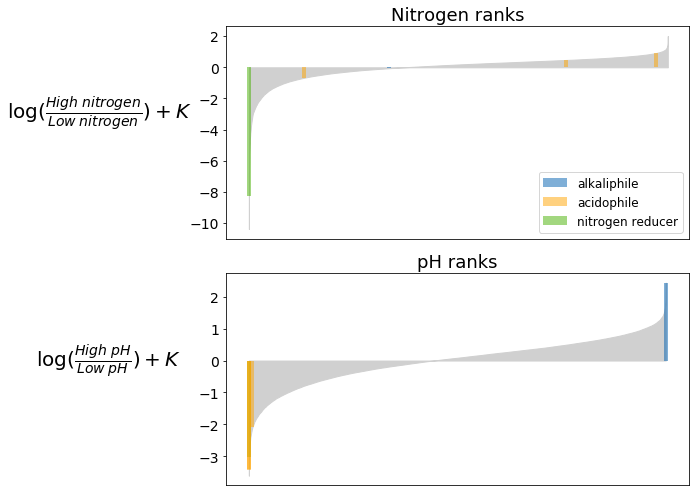

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
x = np.arange(len(nitro_beta))
y1 = np.array(nitro_beta.values)

nitro_reducers = list(functional_role.loc[functional_role == 'nitrogen_reducer'].index)
alkaliphiles = list(functional_role.loc[functional_role == 'alkaliphile'].index)
acidophiles = list(functional_role.loc[functional_role == 'acidophile'].index)

ax[0].fill_between(x, 0, y1, color='#D0D0D0')
ax[0].bar([nitro_beta.index.get_loc(i)-300 for i in alkaliphiles], nitro_beta.loc[alkaliphiles].values, 
          width=300, color='#0060B0', label='alkaliphile', alpha=0.5)  # blue
ax[0].bar([nitro_beta.index.get_loc(i) for i in acidophiles], nitro_beta.loc[acidophiles].values, 
          width=300, color='#FFA500', label='acidophile', alpha=0.5)  # orange
ax[0].bar([nitro_beta.index.get_loc(i) for i in nitro_reducers], nitro_beta.loc[nitro_reducers].values, 
          width=300, color='#46B000', label='nitrogen reducer', alpha=0.5)  # green
ax[0].set_xticks([])
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].legend(fontsize=12)
ax[0].set_title('Nitrogen ranks', fontsize=18)
ax[0].set_ylabel(r'$\log (\frac{High\; nitrogen}{Low\; nitrogen}) + K$', fontsize=20, labelpad=90, rotation=0)

y2 = np.array(ph_beta.values)
ax[1].fill_between(x, 0, y2, color='#D0D0D0')
ax[1].set_xticks([])
ax[1].tick_params(axis='both', which='major', labelsize=14)

ax[1].bar([ph_beta.index.get_loc(i) for i in nitro_reducers], ph_beta.loc[nitro_reducers].values, 
          width=300, color='#46B000', label='nitrogen reducer', alpha=0.5)  # green
ax[1].bar([ph_beta.index.get_loc(i) for i in alkaliphiles], ph_beta.loc[alkaliphiles].values, 
          width=300, color='#0060B0', label='alkaliphile', alpha=0.5)  # blue
ax[1].bar([ph_beta.index.get_loc(i) for i in acidophiles], ph_beta.loc[acidophiles].values, 
          width=300, color='#FFA500', label='acidophile', alpha=0.5)  # orange
ax[1].set_title('pH ranks', fontsize=18)
ax[1].set_ylabel(r'$\log (\frac{High\; pH}{Low\; pH}) + K$', fontsize=20, labelpad=90, rotation=0)
plt.tight_layout()
plt.savefig('../figures/figure4/figure4.png') 